In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import timeit
#import shap
from sklearn.metrics import r2_score, mean_absolute_percentage_error, mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold
from sklearn.model_selection import train_test_split

___

# Read-in and One-Hot Encoding

In [2]:
df1 = pd.read_excel("data_new/train.xlsx", sheet_name="positive_peak_time")
df2 = pd.read_excel("data_new/train.xlsx", sheet_name="negative_peak_time")
df3 = pd.read_excel("data_new/train.xlsx", sheet_name="arrival_time")
df4 = pd.read_excel("data_new/train.xlsx", sheet_name="positive_duration")
df5 = pd.read_excel("data_new/train.xlsx", sheet_name="negative_duration")
df6 = pd.read_excel("data_new/train.xlsx", sheet_name="positive_pressure")
df7 = pd.read_excel("data_new/train.xlsx", sheet_name="negative_pressure")
df8 = pd.read_excel("data_new/train.xlsx", sheet_name="positive_impulse")



dt1 = pd.read_excel("data_new/test.xlsx", sheet_name="positive_peak_time")
dt2 = pd.read_excel("data_new/test.xlsx", sheet_name="negative_peak_time")
dt3 = pd.read_excel("data_new/test.xlsx", sheet_name="arrival_time")
dt4 = pd.read_excel("data_new/test.xlsx", sheet_name="positive_duration")
dt5 = pd.read_excel("data_new/test.xlsx", sheet_name="negative_duration")
dt6 = pd.read_excel("data_new/test.xlsx", sheet_name="positive_pressure")
dt7 = pd.read_excel("data_new/test.xlsx", sheet_name="negative_pressure")
dt8 = pd.read_excel("data_new/test.xlsx", sheet_name="positive_impulse")

In [3]:
df1

,ID,Tank Failure Pressure (bar),Liquid Ratio (%),Tank Width (m),Tank Length (m),Tank Height (m),Height of BLEVE (m),Tank Height with Gas (m),Vapour Temerature (K),Liquid Temerature (K),Status,Stand-off Distance,Target
0,B291,13.6,0.665119,1.0,4.0,0.8,1.8,0.4,435.0,372.5,Superheated,5,0.012166
1,B291,13.6,0.665119,1.0,4.0,0.8,1.8,0.4,435.0,372.5,Superheated,6,0.014556
2,B291,13.6,0.665119,1.0,4.0,0.8,1.8,0.4,435.0,372.5,Superheated,7,0.017034
3,B291,13.6,0.665119,1.0,4.0,0.8,1.8,0.4,435.0,372.5,Superheated,8,0.019576
4,B291,13.6,0.665119,1.0,4.0,0.8,1.8,0.4,435.0,372.5,Superheated,9,0.022172
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21595,B103,30.7,0.181290,0.6,2.0,2.8,1.2,2.2,334.7,404.9,Subcooled,36,0.093782
21596,B103,30.7,0.181290,0.6,2.0,2.8,1.2,2.2,334.7,404.9,Subcooled,37,0.096635
21597,B103,30.7,0.181290,0.6,2.0,2.8,1.2,2.2,334.7,404.9,Subcooled,38,0.099487
21598,B103,30.7,0.181290,0.6,2.0,2.8,1.2,2.2,334.7,404.9,Subcooled,39,0.102341


In [4]:
dt1

,ID,Tank Failure Pressure (bar),Liquid Ratio (%),Tank Width (m),Tank Length (m),Tank Height (m),Height of BLEVE (m),Tank Height with Gas (m),Vapour Temerature (K),Liquid Temerature (K),Status,Stand-off Distance,Target
0,P197,11.559040,0.602823,3.0,0.8,2.2,0.2,1.0,296.7,328.5,Superheated,5,0.012114
1,P197,11.559040,0.602823,3.0,0.8,2.2,0.2,1.0,296.7,328.5,Superheated,6,0.014798
2,P197,11.559040,0.602823,3.0,0.8,2.2,0.2,1.0,296.7,328.5,Superheated,7,0.017533
3,P197,11.559040,0.602823,3.0,0.8,2.2,0.2,1.0,296.7,328.5,Superheated,8,0.020293
4,P197,11.559040,0.602823,3.0,0.8,2.2,0.2,1.0,296.7,328.5,Superheated,9,0.023077
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7195,P55,5.970915,0.284706,0.6,9.8,2.8,1.0,2.2,439.3,349.9,Superheated,36,0.091819
7196,P55,5.970915,0.284706,0.6,9.8,2.8,1.0,2.2,439.3,349.9,Superheated,37,0.094618
7197,P55,5.970915,0.284706,0.6,9.8,2.8,1.0,2.2,439.3,349.9,Superheated,38,0.097421
7198,P55,5.970915,0.284706,0.6,9.8,2.8,1.0,2.2,439.3,349.9,Superheated,39,0.100227


In [5]:
# Label encoding 'Status' feature into 0 and 1 
# 0 for Subcooled and 1 for Superheated

from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

df5['Status'] = LE.fit_transform(df5['Status'])
dt5['Status'] = LE.fit_transform(dt5['Status'])

df5

,ID,Tank Failure Pressure (bar),Liquid Ratio (%),Tank Width (m),Tank Length (m),Tank Height (m),Height of BLEVE (m),Tank Height with Gas (m),Vapour Temerature (K),Liquid Temerature (K),Status,Stand-off Distance,Target
0,B291,13.6,0.665119,1.0,4.0,0.8,1.8,0.4,435.0,372.5,1,5,0.009827
1,B291,13.6,0.665119,1.0,4.0,0.8,1.8,0.4,435.0,372.5,1,6,0.009906
2,B291,13.6,0.665119,1.0,4.0,0.8,1.8,0.4,435.0,372.5,1,7,0.009970
3,B291,13.6,0.665119,1.0,4.0,0.8,1.8,0.4,435.0,372.5,1,8,0.010039
4,B291,13.6,0.665119,1.0,4.0,0.8,1.8,0.4,435.0,372.5,1,9,0.010011
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21595,B103,30.7,0.181290,0.6,2.0,2.8,1.2,2.2,334.7,404.9,0,36,0.017944
21596,B103,30.7,0.181290,0.6,2.0,2.8,1.2,2.2,334.7,404.9,0,37,0.017724
21597,B103,30.7,0.181290,0.6,2.0,2.8,1.2,2.2,334.7,404.9,0,38,0.017498
21598,B103,30.7,0.181290,0.6,2.0,2.8,1.2,2.2,334.7,404.9,0,39,0.017280


In [6]:
dt5.iloc[30:50,:]

,ID,Tank Failure Pressure (bar),Liquid Ratio (%),Tank Width (m),Tank Length (m),Tank Height (m),Height of BLEVE (m),Tank Height with Gas (m),Vapour Temerature (K),Liquid Temerature (K),Status,Stand-off Distance,Target
30,P197,11.55904,0.602823,3.0,0.8,2.2,0.2,1.0,296.7,328.5,1,35,0.015426
31,P197,11.55904,0.602823,3.0,0.8,2.2,0.2,1.0,296.7,328.5,1,36,0.015341
32,P197,11.55904,0.602823,3.0,0.8,2.2,0.2,1.0,296.7,328.5,1,37,0.015277
33,P197,11.55904,0.602823,3.0,0.8,2.2,0.2,1.0,296.7,328.5,1,38,0.015224
34,P197,11.55904,0.602823,3.0,0.8,2.2,0.2,1.0,296.7,328.5,1,39,0.015191
35,P197,11.55904,0.602823,3.0,0.8,2.2,0.2,1.0,296.7,328.5,1,40,0.015170
36,P168,12.72223,0.648320,1.8,8.2,0.6,1.8,0.2,389.7,296.4,0,5,0.009043
37,P168,12.72223,0.648320,1.8,8.2,0.6,1.8,0.2,389.7,296.4,0,6,0.009390
38,P168,12.72223,0.648320,1.8,8.2,0.6,1.8,0.2,389.7,296.4,0,7,0.009452
39,P168,12.72223,0.648320,1.8,8.2,0.6,1.8,0.2,389.7,296.4,0,8,0.009528


In [7]:
X_traindf = df5.drop(['ID','Target'], axis=1)
X_testdf = dt5.drop(['ID','Target'], axis=1)

X_traindf

,Tank Failure Pressure (bar),Liquid Ratio (%),Tank Width (m),Tank Length (m),Tank Height (m),Height of BLEVE (m),Tank Height with Gas (m),Vapour Temerature (K),Liquid Temerature (K),Status,Stand-off Distance
0,13.6,0.665119,1.0,4.0,0.8,1.8,0.4,435.0,372.5,1,5
1,13.6,0.665119,1.0,4.0,0.8,1.8,0.4,435.0,372.5,1,6
2,13.6,0.665119,1.0,4.0,0.8,1.8,0.4,435.0,372.5,1,7
3,13.6,0.665119,1.0,4.0,0.8,1.8,0.4,435.0,372.5,1,8
4,13.6,0.665119,1.0,4.0,0.8,1.8,0.4,435.0,372.5,1,9
...,...,...,...,...,...,...,...,...,...,...,...
21595,30.7,0.181290,0.6,2.0,2.8,1.2,2.2,334.7,404.9,0,36
21596,30.7,0.181290,0.6,2.0,2.8,1.2,2.2,334.7,404.9,0,37
21597,30.7,0.181290,0.6,2.0,2.8,1.2,2.2,334.7,404.9,0,38
21598,30.7,0.181290,0.6,2.0,2.8,1.2,2.2,334.7,404.9,0,39


In [8]:
X_testdf

,Tank Failure Pressure (bar),Liquid Ratio (%),Tank Width (m),Tank Length (m),Tank Height (m),Height of BLEVE (m),Tank Height with Gas (m),Vapour Temerature (K),Liquid Temerature (K),Status,Stand-off Distance
0,11.559040,0.602823,3.0,0.8,2.2,0.2,1.0,296.7,328.5,1,5
1,11.559040,0.602823,3.0,0.8,2.2,0.2,1.0,296.7,328.5,1,6
2,11.559040,0.602823,3.0,0.8,2.2,0.2,1.0,296.7,328.5,1,7
3,11.559040,0.602823,3.0,0.8,2.2,0.2,1.0,296.7,328.5,1,8
4,11.559040,0.602823,3.0,0.8,2.2,0.2,1.0,296.7,328.5,1,9
...,...,...,...,...,...,...,...,...,...,...,...
7195,5.970915,0.284706,0.6,9.8,2.8,1.0,2.2,439.3,349.9,1,36
7196,5.970915,0.284706,0.6,9.8,2.8,1.0,2.2,439.3,349.9,1,37
7197,5.970915,0.284706,0.6,9.8,2.8,1.0,2.2,439.3,349.9,1,38
7198,5.970915,0.284706,0.6,9.8,2.8,1.0,2.2,439.3,349.9,1,39


In [9]:
y5_train = df5['Target']
y5_train

0        0.009827
1        0.009906
2        0.009970
3        0.010039
4        0.010011
           ...   
21595    0.017944
21596    0.017724
21597    0.017498
21598    0.017280
21599    0.017078
Name: Target, Length: 21600, dtype: float64

In [10]:
y1_train = df1['Target']
y2_train = df2['Target']
y3_train = df3['Target']
y4_train = df4['Target']
y6_train = df6['Target']
y7_train = df7['Target']
y8_train = df8['Target']

In [11]:
y1_test = dt1['Target']
y2_test = dt2['Target']
y3_test = dt3['Target']
y4_test = dt4['Target']
y5_test = dt5['Target']
y6_test = dt6['Target']
y7_test = dt7['Target']
y8_test = dt8['Target']

y1_test

0       0.012114
1       0.014798
2       0.017533
3       0.020293
4       0.023077
          ...   
7195    0.091819
7196    0.094618
7197    0.097421
7198    0.100227
7199    0.103035
Name: Target, Length: 7200, dtype: float64

In [12]:
y_train = np.concatenate((y1_train.values.reshape(-1,1), y2_train.values.reshape(-1,1), y3_train.values.reshape(-1,1), 
                          y4_train.values.reshape(-1,1), y5_train.values.reshape(-1,1), y6_train.values.reshape(-1,1),
                          y7_train.values.reshape(-1,1), y8_train.values.reshape(-1,1)), axis=1)

y_test = np.concatenate((y1_test.values.reshape(-1,1), y2_test.values.reshape(-1,1), y3_test.values.reshape(-1,1), 
                          y4_test.values.reshape(-1,1), y5_test.values.reshape(-1,1), y6_test.values.reshape(-1,1),
                          y7_test.values.reshape(-1,1), y8_test.values.reshape(-1,1)), axis=1)

In [13]:
print(y_train.shape)
print(y_test.shape)

y_train

(21600, 8)
(7200, 8)


array([[ 1.21663990e-02,  1.92270974e-02,  1.02530480e-02, ...,
         6.13340850e-01, -2.35990550e-01,  1.05453270e+02],
       [ 1.45556140e-02,  2.19475630e-02,  1.24416710e-02, ...,
         4.85479950e-01, -2.01730860e-01,  8.91907810e+01],
       [ 1.70337890e-02,  2.47348970e-02,  1.47326780e-02, ...,
         3.97631170e-01, -1.78507950e-01,  7.72377550e+01],
       ...,
       [ 9.94869250e-02,  1.13699184e-01,  9.45632310e-02, ...,
         6.88239110e-02, -4.64044960e-02,  2.74606420e+01],
       [ 1.02341190e-01,  1.16520062e-01,  9.73516780e-02, ...,
         6.64670090e-02, -4.60044180e-02,  2.67297230e+01],
       [ 1.05201100e-01,  1.19343956e-01,  1.00149770e-01, ...,
         6.42466250e-02, -4.48966060e-02,  2.60354210e+01]])

In [14]:
y_test

array([[ 1.21143940e-02,  2.36260840e-02,  9.64583550e-03, ...,
         2.50615600e-01, -1.13256240e-01,  5.26190380e+01],
       [ 1.47982630e-02,  2.66367886e-02,  1.20925640e-02, ...,
         2.00786950e-01, -1.03320270e-01,  4.60554850e+01],
       [ 1.75325390e-02,  2.95875370e-02,  1.46107920e-02, ...,
         1.66701170e-01, -9.43374630e-02,  4.11314200e+01],
       ...,
       [ 9.74210350e-02,  1.11182812e-01,  9.28768070e-02, ...,
         9.06703620e-02, -5.40905860e-02,  3.56521530e+01],
       [ 1.00227500e-01,  1.14051970e-01,  9.56180690e-02, ...,
         8.74992310e-02, -5.23571000e-02,  3.46799510e+01],
       [ 1.03034510e-01,  1.16930324e-01,  9.83653590e-02, ...,
         8.45144470e-02, -5.04742410e-02,  3.37590220e+01]])

___

# Standardization and Power Transform

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import QuantileTransformer

In [16]:
# Processing both X_train and X_test using standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_traindf)
X_test = scaler.transform(X_testdf)

In [17]:
# Double check if it succeeded
# df_stdscal = pd.DataFrame(X_train)
# df_stdscal.hist(figsize = (20,20), bins=10)

In [18]:
# Exactly the same result as not concatenate the targets and use 8 different quantiles
quantile = QuantileTransformer(output_distribution='normal', random_state=42)   

y_train_normal = quantile.fit_transform(y_train)
y_test_normal = quantile.transform(y_test)

In [19]:
y_test_normal[:, 7]

array([-0.006322  , -0.13282937, -0.24046414, ..., -0.38265482,
       -0.40983319, -0.43632482])

In [20]:
y_test_check = quantile.inverse_transform(y_test_normal)
y_test_check[:41,7]

array([52.619038, 46.055485, 41.13142 , 37.34763 , 34.215847, 31.660479,
       29.51226 , 27.62623 , 25.996059, 24.593987, 23.341728, 22.203737,
       21.178555, 20.26375 , 19.439846, 18.682037, 17.977852, 17.324688,
       16.722097, 16.167007, 15.652895, 15.172283, 14.719731, 14.292322,
       13.888784, 13.508397, 13.149973, 12.811902, 12.492044, 12.188312,
       11.898917, 11.622511, 11.358176, 11.105268, 10.863276, 10.631696,
       83.744408, 73.62957 , 65.149193, 58.173275, 52.403481])

In [21]:
y_test[:41,7]

array([52.619038, 46.055485, 41.13142 , 37.34763 , 34.215847, 31.660479,
       29.51226 , 27.62623 , 25.996059, 24.593987, 23.341728, 22.203737,
       21.178555, 20.26375 , 19.439846, 18.682037, 17.977852, 17.324688,
       16.722097, 16.167007, 15.652895, 15.172283, 14.719731, 14.292322,
       13.888784, 13.508397, 13.149973, 12.811902, 12.492044, 12.188312,
       11.898917, 11.622511, 11.358176, 11.105268, 10.863276, 10.631696,
       83.744408, 73.62957 , 65.149193, 58.173275, 52.403481])

In [22]:
y_test[:41,0]

array([0.01211439, 0.01479826, 0.01753254, 0.02029282, 0.02307727,
       0.02587964, 0.02868815, 0.03150966, 0.03434225, 0.037178  ,
       0.04002112, 0.04286748, 0.04571595, 0.04857137, 0.05142754,
       0.05428724, 0.05714883, 0.06000718, 0.06287168, 0.06574076,
       0.06860342, 0.07147225, 0.07433977, 0.07720977, 0.08007828,
       0.08294813, 0.08582465, 0.08869528, 0.09156465, 0.09443945,
       0.09731422, 0.10018831, 0.10305857, 0.10593449, 0.10880873,
       0.11168547, 0.01398577, 0.01653403, 0.01912764, 0.02175327,
       0.02441173])

In [24]:
y_test_normal[:,4]

array([ 0.12956022,  0.06955296,  0.03501374, ..., -0.16738969,
       -0.15636172, -0.14388893])

___

# ANN

In [25]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

torch.backends.cudnn.version() , torch.backends.cudnn.enabled
torch.manual_seed(0)

In [26]:
# convert data to torch.FloatTensor
X_train_torch = torch.from_numpy(X_train.astype(np.float32))
X_test_torch = torch.from_numpy(X_test.astype(np.float32))



y_train_torch = torch.from_numpy(y_train_normal.astype(np.float32))
y_test_torch = torch.from_numpy(y_test_normal.astype(np.float32))


print(X_train_torch)

tensor([[-0.8024,  0.7595, -0.9898,  ...,  0.6962,  1.3190, -1.6846],
        [-0.8024,  0.7595, -0.9898,  ...,  0.6962,  1.3190, -1.5883],
        [-0.8024,  0.7595, -0.9898,  ...,  0.6962,  1.3190, -1.4921],
        ...,
        [ 0.9096, -1.3719, -1.5129,  ...,  1.5587, -0.7582,  1.4921],
        [ 0.9096, -1.3719, -1.5129,  ...,  1.5587, -0.7582,  1.5883],
        [ 0.9096, -1.3719, -1.5129,  ...,  1.5587, -0.7582,  1.6846]])


In [27]:
y_train_torch

tensor([[-1.8878, -2.6412, -1.8978,  ...,  1.3802, -1.4426,  0.6927],
        [-1.5732, -2.1187, -1.5748,  ...,  1.1909, -1.2257,  0.5174],
        [-1.3570, -1.7601, -1.3660,  ...,  1.0275, -1.0601,  0.3689],
        ...,
        [ 1.4216,  1.3089,  1.4319,  ..., -0.7408,  0.7991, -0.6441],
        [ 1.6162,  1.4910,  1.6337,  ..., -0.7787,  0.8107, -0.6733],
        [ 1.8511,  1.7361,  1.8826,  ..., -0.8198,  0.8473, -0.6979]])

In [28]:
y_test_torch

tensor([[-1.8947, -1.8800, -2.0452,  ...,  0.6301, -0.4754, -0.0063],
        [-1.5462, -1.5752, -1.6165,  ...,  0.4224, -0.3520, -0.1328],
        [-1.3203, -1.3580, -1.3736,  ...,  0.2338, -0.2298, -0.2405],
        ...,
        [ 1.3003,  1.1768,  1.3228,  ..., -0.4314,  0.5893, -0.3827],
        [ 1.4655,  1.3283,  1.4963,  ..., -0.4692,  0.6343, -0.4098],
        [ 1.6633,  1.5193,  1.7074,  ..., -0.5085,  0.6895, -0.4363]])

In [27]:
train_data = []
for i in range(len(X_train_torch)):
   train_data.append([X_train_torch[i],
                      y_train_torch[i] 
                     ])

test_data = []
for i in range(len(X_test_torch)):
   test_data.append([X_test_torch[i], 
                     y_test_torch[i]
                     ])


# prepare data loaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=512,               # batch_size could be smaller
    num_workers=0, shuffle=True)                                                                   # Increasing num_workers slow down the training because it does not use GPU at all
test_loader = torch.utils.data.DataLoader(test_data, batch_size=512,
    num_workers=0)

In [32]:
for x,y in train_loader:
    print(y.shape)
    break

torch.Size([512, 8])


In [29]:
## Define the NN architecture
## NN with 3 hidden layer, s=[11, 256, 256, 256, 8]

class BleveNet(nn.Module):
    def __init__(self):
        super(BleveNet, self).__init__()
        # The first hidden layer has 256 neurons
        self.fc1 = nn.Linear(X_train_torch.shape[1], 256)
        # The second hidden layer has 256 neurons
        self.fc2 = nn.Linear(256, 256)
        # The third hidden layer has 256 neurons
        self.fc3 = nn.Linear(256, 256)
        # The final layer has 8 output neurons
        self.fc4 = nn.Linear(256, 8)


        # Define proportion or neurons to dropout
        self.dropout = nn.Dropout(0.1)

        # Mish activation
        self.mish = nn.Mish()


    def forward(self, x):
        # add first fully connected layer
        x = self.fc1(x)
        x = self.mish(x)
        x = self.dropout(x)
        # add second fully connected layer
        x = self.fc2(x)
        x = self.mish(x)
        x = self.dropout(x)
        # add third fully connected layer
        x = self.fc3(x)
        x = self.mish(x)
        x = self.dropout(x)
        # add final output layers:
        output = self.fc4(x)
       
        return output

# initialize the NN
model = BleveNet()
print(model)

BleveNet(
  (fc1): Linear(in_features=11, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=256, bias=True)
  (fc4): Linear(in_features=256, out_features=8, bias=True)
  (dropout): Dropout(p=0.1, inplace=False)
  (mish): Mish()
)


In [34]:
criterion = nn.HuberLoss()        # This is the best loss function for my model
# criterion = nn.MSELoss()


optimizer = torch.optim.Adam(model.parameters(), lr=0.005, weight_decay=1e-5)     # This is the best optimizer for my model 

# Check for GPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [35]:
startTime = timeit.default_timer() 


n_epochs = 500 

model.to(device)    # bring the model to gpu

train_losses = []
lowest_mape = 100
for epoch in range(n_epochs):

    model.train()       
    # monitor training loss
    train_loss = 0.0
    
    ###################
    # train the model #
    ###################
    for data, targets in train_loader:
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        #bring data and target to gpu
        data, targets = data.to(device), targets.to(device)
        
        # forward pass: compute predicted outputs by passing inputs to the model
        outputs = model(data)
        # calculate the loss
        loss = criterion(outputs, targets)
        
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
        # update running training loss
        train_loss += loss.item()*data.size(0)
        
    # print training statistics 
    # calculate average loss over an epoch
    train_loss = train_loss/len(train_loader.dataset)
    train_losses.append(train_loss)

    print('Epoch: {}/{} \tTraining Loss: {:.6f}'.format(
        epoch+1,
        n_epochs, 
        train_loss
        ))
    

    ############################
    # Evaluate the lowest MAPE #
    ############################
    model.eval()
    with torch.no_grad():  # turn off gradient to save memory
        y_predNN_torch = model(X_test_torch.to(device))

    y_predNN = quantile.inverse_transform(y_predNN_torch.cpu().numpy())
    MAPE = mean_absolute_percentage_error(y_test, y_predNN)

    if MAPE < lowest_mape:
        lowest_mape = MAPE
        print(f'Lowest MAPE: {lowest_mape}')
        torch.save(model.state_dict(), 'PyTorch_Model/Multiclass_lowest.pt')
    print()



endTime = timeit.default_timer()
runningTotal = (endTime - startTime)
print(f"Time taken: {runningTotal}")

Epoch: 1/500 	Training Loss: 0.073185
Lowest MAPE: 0.0812842932887275

Epoch: 2/500 	Training Loss: 0.023410
Lowest MAPE: 0.06270864796012655

Epoch: 3/500 	Training Loss: 0.019410
Lowest MAPE: 0.05445723449106838

Epoch: 4/500 	Training Loss: 0.017184

Epoch: 5/500 	Training Loss: 0.016587
Lowest MAPE: 0.05267491464628497

Epoch: 6/500 	Training Loss: 0.014419

Epoch: 7/500 	Training Loss: 0.014248
Lowest MAPE: 0.05218048544764304

Epoch: 8/500 	Training Loss: 0.014171

Epoch: 9/500 	Training Loss: 0.012945
Lowest MAPE: 0.04948011544165339

Epoch: 10/500 	Training Loss: 0.012216

Epoch: 11/500 	Training Loss: 0.011993
Lowest MAPE: 0.0457037708290091

Epoch: 12/500 	Training Loss: 0.011444

Epoch: 13/500 	Training Loss: 0.011461

Epoch: 14/500 	Training Loss: 0.011661
Lowest MAPE: 0.04490273839312044

Epoch: 15/500 	Training Loss: 0.011099

Epoch: 16/500 	Training Loss: 0.010670

Epoch: 17/500 	Training Loss: 0.011008
Lowest MAPE: 0.04350813024816586

Epoch: 18/500 	Training Loss: 0.00

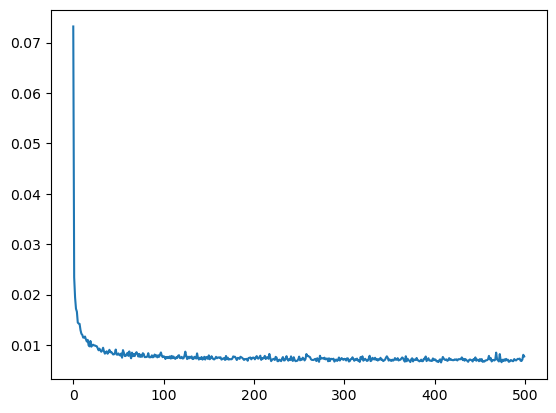

In [36]:
plt.plot(train_losses)

# Save the model  -- I already saved this and submitted
# torch.save(model.state_dict(), 'PyTorch_Model/Default5_MultiLabel_NN_mish_Drop_L2_Huber_200Epochs.pt')

**Loading the saved state**

In [38]:
model.load_state_dict(torch.load('PyTorch_Model/Multiclass_lowest.pt', map_location=torch.device('cpu')))

model.eval()           # prep model for *evaluation*
model.to(device)
with torch.no_grad():  # turn off gradient to save memory
    y_predNN_torch = model(X_test_torch.to(device))

y_predNN_normal = y_predNN_torch.cpu().numpy()     # convert to numpy array
y_test_normal = y_test_torch.cpu().numpy()
print(y_predNN_normal)

[[-1.7732613  -1.7363936  -1.864326   ...  0.34186313 -0.44920227
  -0.17205708]
 [-1.4931529  -1.4907876  -1.5640367  ...  0.17314024 -0.30879396
  -0.2930552 ]
 [-1.2761368  -1.289819   -1.3342141  ...  0.01411374 -0.18087645
  -0.40138522]
 ...
 [ 1.1942611   1.0929439   1.2121142  ... -0.42607814  0.5861014
  -0.42136794]
 [ 1.3382828   1.232518    1.3591359  ... -0.46174347  0.6253218
  -0.44572175]
 [ 1.5024195   1.3953619   1.5275326  ... -0.49622694  0.6630641
  -0.46994415]]


In [40]:
mape = mean_absolute_percentage_error(y_test_normal, y_predNN_normal)
r2 = r2_score(y_test_normal, y_predNN_normal)
print(f"Neural Network scores in normal distribution: r2 = {r2}, mape = {mape}")

Neural Network scores in normal distribution: r2 = 0.9884018478359508, mape = 0.4099877178668976


In [42]:
y_predNN = quantile.inverse_transform(y_predNN_normal)
mape = mean_absolute_percentage_error(y_test, y_predNN.astype('float64'))
r2 = r2_score(y_test, y_predNN)
print(f"Neural Network scores in actual distribution: r2 = {r2}, mape = {mape}")
print('*'*20)
print()



target_name = ['Positive Peak Time', 'Negative Peak Time', "Arrival Time", 'Positive Duration',
               'Negative Duration', 'Positive Pressure', 'Negative Pressure', 'Positive Impulse']

for i in range(8):
    r2 = r2_score(y_test[:,i], y_predNN[:,i])
    mape = mean_absolute_percentage_error(y_test[:,i], y_predNN[:,i])
    rmse = np.sqrt(mean_squared_error(y_test[:,i], y_predNN[:,i]))

    print(target_name[i])
    print('r2:', r2*100)
    print('mape:', mape*100)
    print('rmse:', rmse)
    print()



Neural Network scores in actual distribution: r2 = 0.9876241729466264, mape = 0.035141265162355946
********************

Positive Peak Time
r2: 99.89494870893564
mape: 1.4089290260194356
rmse: 0.0009308693561093738

Negative Peak Time
r2: 99.8792252175759
mape: 1.2885602427634089
rmse: 0.0010374958391545452

Arrival Time
r2: 99.90891956659755
mape: 1.4066818974750102
rmse: 0.0008366443410444529

Positive Duration
r2: 96.99385953031975
mape: 3.549214203588457
rmse: 0.0005861337680128617

Negative Duration
r2: 98.30943167801884
mape: 3.9248423916935655
rmse: 0.000818462921559852

Positive Pressure
r2: 98.9064254699371
mape: 5.126049733121049
rmse: 0.03490150568259898

Negative Pressure
r2: 99.09580348108253
mape: 5.739283930519386
rmse: 0.0074576404985244975

Positive Impulse
r2: 97.11072470483379
mape: 5.669450704704502
rmse: 17.162761767751437



In [43]:
y_predNN[1:41,7]

array([39.035442 , 35.00176  , 31.771221 , 29.145592 , 27.051378 ,
       25.268974 , 23.749014 , 22.377186 , 21.162865 , 20.058002 ,
       19.029593 , 18.114578 , 17.321451 , 16.584347 , 15.924688 ,
       15.321336 , 14.729981 , 14.20329  , 13.738471 , 13.328538 ,
       12.947655 , 12.634707 , 12.346261 , 12.044807 , 11.767007 ,
       11.53119  , 11.3074255, 11.0753   , 10.8568325, 10.616056 ,
       10.421783 , 10.188109 ,  9.962062 ,  9.774242 ,  9.57737  ,
       91.10885  , 79.96619  , 70.72304  , 62.842068 , 56.249092 ],
      dtype=float32)

In [44]:
y_test[1:41,7]

array([46.055485, 41.13142 , 37.34763 , 34.215847, 31.660479, 29.51226 ,
       27.62623 , 25.996059, 24.593987, 23.341728, 22.203737, 21.178555,
       20.26375 , 19.439846, 18.682037, 17.977852, 17.324688, 16.722097,
       16.167007, 15.652895, 15.172283, 14.719731, 14.292322, 13.888784,
       13.508397, 13.149973, 12.811902, 12.492044, 12.188312, 11.898917,
       11.622511, 11.358176, 11.105268, 10.863276, 10.631696, 83.744408,
       73.62957 , 65.149193, 58.173275, 52.403481])

In [45]:
y_test

array([[ 1.21143940e-02,  2.36260840e-02,  9.64583550e-03, ...,
         2.50615600e-01, -1.13256240e-01,  5.26190380e+01],
       [ 1.47982630e-02,  2.66367886e-02,  1.20925640e-02, ...,
         2.00786950e-01, -1.03320270e-01,  4.60554850e+01],
       [ 1.75325390e-02,  2.95875370e-02,  1.46107920e-02, ...,
         1.66701170e-01, -9.43374630e-02,  4.11314200e+01],
       ...,
       [ 9.74210350e-02,  1.11182812e-01,  9.28768070e-02, ...,
         9.06703620e-02, -5.40905860e-02,  3.56521530e+01],
       [ 1.00227500e-01,  1.14051970e-01,  9.56180690e-02, ...,
         8.74992310e-02, -5.23571000e-02,  3.46799510e+01],
       [ 1.03034510e-01,  1.16930324e-01,  9.83653590e-02, ...,
         8.45144470e-02, -5.04742410e-02,  3.37590220e+01]])

In [46]:
# Positive Impulse
print("Positive Pressure")
print(y_predNN[:,5])
print()

# Negative Pressure
print("Negative Pressure")
print(y_predNN[1010:1020,6])
print()


# Positive Impulse
print("Positive Impulse")
print(y_predNN[:10,7])

Positive Pressure
[0.18506378 0.15718311 0.13548233 ... 0.09107156 0.08809928 0.08549286]

Negative Pressure
[-0.13137777 -0.11863906 -0.10875199 -0.10032573 -0.0930666  -0.0868476
 -0.08177273 -0.07710817 -0.0727025  -0.06877515]

Positive Impulse
[44.259777 39.035442 35.00176  31.771221 29.145592 27.051378 25.268974
 23.749014 22.377186 21.162865]


___

# Positive Peak Time

In [47]:
mape = mean_absolute_percentage_error(y_test[:,0], y_predNN[:,0])
r2 = r2_score(y_test[:,0], y_predNN[:,0])
rmse = np.sqrt(mean_squared_error(y_test[:,0], y_predNN[:,0]))


print(f"Scores in actual distribution for arrival time: r2 = {r2}, mape = {mape}, rmse = {rmse}")

Scores in actual distribution for arrival time: r2 = 0.9989494870893564, mape = 0.014089290260194356, rmse = 0.0009308693561093738


____

# Negative Peak Time

In [48]:
mape = mean_absolute_percentage_error(y_test[:,1], y_predNN[:,1])
r2 = r2_score(y_test[:,1], y_predNN[:,1])
rmse = np.sqrt(mean_squared_error(y_test[:,1], y_predNN[:,1]))


print(f"Scores in actual distribution for arrival time: r2 = {r2}, mape = {mape}, rmse = {rmse}")

Scores in actual distribution for arrival time: r2 = 0.998792252175759, mape = 0.012885602427634089, rmse = 0.0010374958391545452


___

# Arrival Time

In [49]:
mape = mean_absolute_percentage_error(y_test[:,2], y_predNN[:,2])
r2 = r2_score(y_test[:,2], y_predNN[:,2])
rmse = np.sqrt(mean_squared_error(y_test[:,2], y_predNN[:,2]))


print(f"Scores in actual distribution for arrival time: r2 = {r2}, mape = {mape}, rmse = {rmse}")

Scores in actual distribution for arrival time: r2 = 0.9990891956659755, mape = 0.014066818974750102, rmse = 0.0008366443410444529


___

# Positive Duration

In [50]:
mape = mean_absolute_percentage_error(y_test[:,3], y_predNN[:,3])
r2 = r2_score(y_test[:,3], y_predNN[:,3])
rmse = np.sqrt(mean_squared_error(y_test[:,4], y_predNN[:,3]))


print(f"Scores in actual distribution for arrival time: r2 = {r2}, mape = {mape}, rmse = {rmse}")

Scores in actual distribution for arrival time: r2 = 0.9699385953031976, mape = 0.03549214203588457, rmse = 0.007900480852990036


___

# Negative Duration

In [51]:
mape = mean_absolute_percentage_error(y_test[:,4], y_predNN[:,4])
r2 = r2_score(y_test[:,4], y_predNN[:,4])
rmse = np.sqrt(mean_squared_error(y_test[:,4], y_predNN[:,4]))


print(f"Scores in actual distribution for arrival time: r2 = {r2}, mape = {mape}, rmse = {rmse}")

Scores in actual distribution for arrival time: r2 = 0.9830943167801884, mape = 0.03924842391693566, rmse = 0.000818462921559852


In [52]:
y_test[100:120, 4]

array([0.0070927 , 0.00708828, 0.00709008, 0.0070853 , 0.00707912,
       0.00706785, 0.00706412, 0.00704504, 0.00988789, 0.01012937,
       0.01037642, 0.01030135, 0.01078974, 0.01087129, 0.0107311 ,
       0.01087087, 0.01152926, 0.0117134 , 0.01242085, 0.01263455])

In [53]:
y_predNN[100:120, 4]

array([0.0069057 , 0.00691829, 0.00692968, 0.00693917, 0.00694591,
       0.00694949, 0.00695058, 0.00695045, 0.01020936, 0.01033068,
       0.01050642, 0.01067972, 0.01083133, 0.010956  , 0.01106422,
       0.01116485, 0.01125077, 0.01132923, 0.01141655, 0.01148551],
      dtype=float32)

___

# Positive Pressure

In [54]:
mape = mean_absolute_percentage_error(y_test[:,5], y_predNN[:,5])
r2 = r2_score(y_test[:,5], y_predNN[:,5])
rmse = np.sqrt(mean_squared_error(y_test[:,5], y_predNN[:,5]))


print(f"Scores in actual distribution for arrival time: r2 = {r2}, mape = {mape}, rmse = {rmse}")

Scores in actual distribution for arrival time: r2 = 0.9890642546993711, mape = 0.05126049733121049, rmse = 0.03490150568259898


In [55]:
y_test[:,5]

array([0.2506156 , 0.20078695, 0.16670117, ..., 0.09067036, 0.08749923,
       0.08451445])

In [56]:
y_predNN[:,5]

array([0.18506378, 0.15718311, 0.13548233, ..., 0.09107156, 0.08809928,
       0.08549286], dtype=float32)

___

# Negative Pressure

In [57]:
mape = mean_absolute_percentage_error(y_test[:,6], y_predNN[:,6])
r2 = r2_score(y_test[:,6], y_predNN[:,6])
rmse = np.sqrt(mean_squared_error(y_test[:,6], y_predNN[:,6]))


print(f"Scores in actual distribution for arrival time: r2 = {r2}, mape = {mape}, rmse = {rmse}")

Scores in actual distribution for arrival time: r2 = 0.9909580348108253, mape = 0.057392839305193864, rmse = 0.0074576404985244975


In [58]:
y_test[1010:1020, 6]

array([-0.13921224, -0.13253026, -0.12156035, -0.10836691, -0.09683013,
       -0.09476076, -0.09015154, -0.08397743, -0.07669979, -0.06937373])

In [59]:
y_predNN[1010:1020, 6]

array([-0.13137777, -0.11863906, -0.10875199, -0.10032573, -0.0930666 ,
       -0.0868476 , -0.08177273, -0.07710817, -0.0727025 , -0.06877515],
      dtype=float32)

____

# Positive Impulse

In [60]:
mape = mean_absolute_percentage_error(y_test[:,7], y_predNN[:,7])
r2 = r2_score(y_test[:,7], y_predNN[:,7])
rmse = np.sqrt(mean_squared_error(y_test[:,7], y_predNN[:,7]))


print(f"Scores in actual distribution for arrival time: r2 = {r2}, mape = {mape}, rmse = {rmse}")

Scores in actual distribution for arrival time: r2 = 0.9711072470483378, mape = 0.05669450704704502, rmse = 17.162761767751437


In [61]:
y_test[:,7]

array([52.619038, 46.055485, 41.13142 , ..., 35.652153, 34.679951,
       33.759022])

In [62]:
y_predNN[:,7]

array([44.259777, 39.035442, 35.00176 , ..., 34.273212, 33.434338,
       32.62831 ], dtype=float32)